Capstone Project - Predicting Traffic Accident Severity
Applied DSc Capstone by IBM/Coursera


1. Introduction

    a. Project's objective from the business or application perspective:

    b. you need to translate this knowledge into a machine learning problem with a preliminary plan to achieve the objectives.
    
    c. Clearly define a problem or an idea of your choice. 
    
    d. Target an audience, you are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.


We are working for an insurance company that wants to create an application for their clients. This application has the objective of helping their clients to plan a safe trip based on weather,road and lighting conditions, by notifying the users when the risk is high. The goal is to minimize road accidents, especially severe ones. This will help the insurance company as they will experience a decrease in their reimboursement rates.

Patterns involved with different circumstances can be detected by developing an accurate prediction model. This cluster will be useful to prevent accidents and develop safety measures. 

2. Data
The original data for this project comes from the following Kaggle data set. In a previous notebook, Feature Selection, I performed a selection of the most relevant features for the prediction of traffic accident severity.

The features of the dataset resulting are the following:
- 'SEVERITYCODE': A code that corresponds to the severity of the collision:
        • 3—fatality
        • 2b—serious injury
        • 2—injury
        • 1—prop damage
        • 0—unknown 
- 'WEATHER': A description of the weather conditions during the time of the collision
- 'ROADCOND': The condition of the road during the collision. 
- 'LIGHTCOND': The light conditions during the collision. 

We want to use our chosen variables to train our machine learning model. 
Before going ahead with creating the app, we will need to check the data and make sure that there is a strong correlation between severe road accidents and the chosen variables.We will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on.







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

3. Data Cleaning
Before starting to run any ML algorithm on the data, the data have to go through the preprocessing part. In this part, data will be cleaned so there is no missing or unusual value. The goal is that the data is the best possible before applying the algorithms.

Importing Data


In [2]:
df = pd.read_csv('/Users/PristerM/Desktop/Data-Collisions.csv')
df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [21]:
df['WEATHER'].describe()

count     184414
unique        11
top        Clear
freq      108959
Name: WEATHER, dtype: object

In [22]:
df['ROADCOND'].describe()

count     184481
unique         9
top          Dry
freq      122076
Name: ROADCOND, dtype: object

In [23]:
df['LIGHTCOND'].describe()

count       184327
unique           9
top       Daylight
freq        113582
Name: LIGHTCOND, dtype: object

From the summary of the data we see that the data types of the chosen fields are coherent with their respective values

Missing values and outliers will be filled with an empy space " ".
We also replaced the following values:'Other', 'Unknown', 'Dark - Unknown Lighting' with NAN

In [4]:
df['SEVERITYCODE'].replace('', np.nan, inplace=True)
df.dropna(subset=['SEVERITYCODE'], inplace=True)
df['X'].replace('', np.nan, inplace=True)
df.dropna(subset=['X'], inplace=True)
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,189339.000000,189339.000000,189339.000000,189339.000000,189339.000000,189339.000000,64748.000000,189339.000000,189339.000000,189339.000000,189339.000000,189339.000000,189339.000000,1.117180e+05,189339.000000,1.893390e+05
mean,1.301671,-122.330518,47.619543,108542.524229,141293.232446,141502.682934,37359.990455,1.301671,2.452986,0.037863,0.028996,1.924136,13.986638,7.969265e+06,276.011567,1.003482e+04
std,0.458984,0.029976,0.056157,62778.210271,86919.354923,87274.294372,51086.718373,0.458984,1.349092,0.200053,0.169143,0.629941,6.720334,2.556300e+06,3358.484174,7.317672e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23808.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.137016e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54112.500000,70244.500000,70244.500000,28665.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.037022e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106995.000000,123461.000000,123461.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.019016e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162598.500000,203708.500000,203848.500000,33969.750000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015601e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
new_df=df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
for colname in ['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']:
    for replacedvalue in ['Other', 'Unknown', 'Dark - Unknown Lighting']:
        new_df[colname].replace(replacedvalue, np.nan, inplace=True)
new_df.dropna(inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Here we look at all unique values for the WEATHER,ROADCOND and LIGHTCOND columns. We need to find these unique values in order to assign to each of them a numeric value, that will allow us to calculate our regression line and our prediction results

In [6]:
new_df.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke',
       'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind',
       'Partly Cloudy'], dtype=object)

In [7]:
new_df.ROADCOND.unique()


array(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

In [8]:
new_df.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off'], dtype=object)

In [30]:
df_values=new_df.replace({'WEATHER' :{'Overcast':3, 'Raining':4, 'Clear':1, 'Snowing':6,
       'Sleet/Hail/Freezing Rain':5, 'Fog/Smog/Smoke':8, 'Blowing Sand/Dirt':7,'Severe Crosswind':9,'Partly Cloudy':2}}
        ).replace({'ROADCOND' :{'Wet':2,
       'Dry':1, 'Snow/Slush':5, 'Ice':6, 'Sand/Mud/Dirt':4, 'Oil':6,'Standing Water':3}}
        ).replace({'LIGHTCOND' :{'Daylight':1, 'Dark - Street Lights On':4,
       'Dark - No Street Lights':5,  'Dusk':2, 'Dawn':3, 'Dark - Street Lights Off':5}})

#new_df = pd.concat([pd.get_dummies(addrtype), pd.get_dummies(collisiontype),pd.get_dummies(weather),pd.get_dummies(roadcond),pd.get_dummies(lightcond)])
new_df['ADDRTYPE'].replace('Intersection',1,inplace=True)
new_df['ADDRTYPE'].replace('Block',2,inplace=True)
new_df['COLLISIONTYPE'].replace('Angles',1,inplace=True)
new_df['COLLISIONTYPE'].replace('Sideswipe',2,inplace=True)
new_df['COLLISIONTYPE'].replace('Parked Car',3,inplace=True)
new_df['COLLISIONTYPE'].replace('Cycles',4,inplace=True)
new_df['COLLISIONTYPE'].replace('Rear Ended',5,inplace=True)
new_df['COLLISIONTYPE'].replace('Head On',6,inplace=True)
new_df['COLLISIONTYPE'].replace('Left Turn',7,inplace=True)
new_df['COLLISIONTYPE'].replace('Pedestrian',8,inplace=True)
new_df['COLLISIONTYPE'].replace('Right Turn',9,inplace=True)
new_df['WEATHER'].replace('Overcast',3,inplace=True)
new_df['WEATHER'].replace('Raining',4,inplace=True)
new_df['WEATHER'].replace('Clear',1,inplace=True)
new_df['WEATHER'].replace('Snowing',7,inplace=True)
new_df['WEATHER'].replace('Sleet/Hail/Freezing Rain',8,inplace=True)
new_df['WEATHER'].replace('Fog/Smog/Smoke',9,inplace=True)
new_df['WEATHER'].replace('Blowing Sand/Dirt',6,inplace=True)
new_df['WEATHER'].replace('Severe Crosswind',5,inplace=True)
new_df['WEATHER'].replace('Partly Cloudy',2,inplace=True)
new_df['ROADCOND'].replace('Wet',3,inplace=True)
new_df['ROADCOND'].replace('Dry',1,inplace=True)
new_df['ROADCOND'].replace('Snow/Slush',6,inplace=True)
new_df['ROADCOND'].replace('Ice',4,inplace=True)
new_df['ROADCOND'].replace('Sand/Mud/Dirt',2,inplace=True)
new_df['ROADCOND'].replace('Oil',7,inplace=True)
new_df['ROADCOND'].replace('Standing Water',5,inplace=True)
new_df['LIGHTCOND'].replace('Daylight',1,inplace=True)
new_df['LIGHTCOND'].replace('Dusk',2,inplace=True)
new_df['LIGHTCOND'].replace('Dawn',3,inplace=True)
new_df['LIGHTCOND'].replace('Dark - Street Lights On',4,inplace=True)
new_df['LIGHTCOND'].replace('Dark - No Street Lights',5,inplace=True)
new_df['LIGHTCOND'].replace('Dark - Street Lights Off',5,inplace=True)

new_df.head()

We now look at our new cleaned dataframe

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166209 entries, 0 to 194672
Data columns (total 4 columns):
SEVERITYCODE    166209 non-null int64
WEATHER         166209 non-null object
ROADCOND        166209 non-null object
LIGHTCOND       166209 non-null object
dtypes: int64(1), object(3)
memory usage: 6.3+ MB


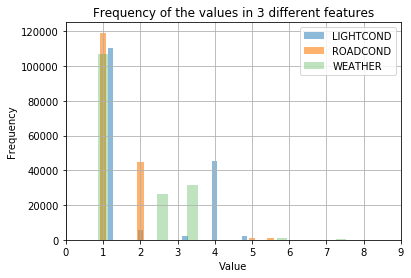

In [31]:
df_values['LIGHTCOND'].hist(alpha=0.5, rwidth=0.35, align='mid', label='LIGHTCOND')
df_values['ROADCOND'].hist(alpha=0.6, rwidth=0.35, align='left', label='ROADCOND')
df_values['WEATHER'].hist(alpha=0.3,rwidth=0.35, align='left', label='WEATHER')


plt.title('Frequency of the values in 3 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

Linear Regression

We now start training our model.

In mathematical modeling, the dependent variable is studied to see if and how much it varies as the independent variables vary. 

With multiple independent variables, the model is yi = a + bxi,1 + bxi,2 + ... + bxi,n + ei, where n is the number of independent variables.

To use linear regression, a scatter plot of data is generated with X as the independent variable and Y as the dependent variable.

SEVERITYCODE is our dependent variable Y while LIGHTCOND,ROADCOND and WEATHER are our X independent variables

Our test size is 25% of our data, while 75% will be our training sample

In [12]:
X = df_values[["LIGHTCOND","ROADCOND","WEATHER"]]
y = df_values[["SEVERITYCODE"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
train_test_split(y, shuffle=False)

[        SEVERITYCODE
 0                  2
 1                  1
 2                  1
 3                  1
 4                  2
 5                  1
 6                  1
 7                  2
 8                  1
 9                  2
 11                 1
 12                 1
 13                 1
 14                 2
 16                 2
 18                 2
 20                 2
 21                 2
 22                 1
 24                 2
 25                 2
 27                 1
 28                 1
 30                 1
 31                 1
 32                 1
 33                 1
 35                 1
 37                 1
 38                 1
 ...              ...
 145976             1
 145978             1
 145979             1
 145980             1
 145981             1
 145982             1
 145983             1
 145984             1
 145985             1
 145986             2
 145987             2
 145988             2
 145989             2
 145990   

In [15]:
print ('X_train: ', X_test)
print ('y_train: ', y_train)
print('X_test: ', X_train)
print ('y_test: ', y_test)

X_train:          LIGHTCOND  ROADCOND  WEATHER
157907          1         1        1
41906           4         2        4
189494          1         1        1
55755           3         2        4
48394           1         1        3
47820           1         1        1
76217           1         2        3
134675          1         1        3
74597           1         1        1
7121            1         1        3
153722          1         1        3
26571           4         1        1
54233           1         1        3
145099          4         1        1
55322           1         1        1
87167           4         2        4
54987           1         1        1
38576           1         1        1
32321           1         1        1
147539          4         1        1
36411           1         1        3
130960          1         1        1
33755           1         1        1
82486           4         2        4
67839           1         2        4
84498           1         1 

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
y_test_list=y_test["SEVERITYCODE"].tolist()
y_pred_list=y_pred.tolist()
df_predict = pd.DataFrame({'Actual': y_test_list, 'Predicted': y_pred_list})
df_predict

,Actual,Predicted
0,1,[1.3391848310364818]
1,2,[1.3110293648620697]
2,1,[1.3391848310364818]
3,2,[1.3224075546547247]
4,2,[1.3498386036431886]
5,1,[1.3391848310364818]
6,1,[1.3398370479366815]
7,1,[1.3498386036431886]
8,2,[1.3391848310364818]
9,1,[1.3498386036431886]


In [18]:
pred_df = pd.DataFrame({"LIGHTCOND":[1,2],"ROADCOND":[2,3],"WEATHER":[4,5]})
print(pred_df)


   LIGHTCOND  ROADCOND  WEATHER
0          1         2        4
1          2         3        5


In [35]:
new_predict = regressor.predict(pred_df)
print("This is the predicted Severity Code: ", new_predict)
for predict in new_predict:
    if new_predict[0]>1.345163934240035:    
        print("The accident is probably going to be severe, the person should drive carefully")
    else:
        print("The accident is probably not severe, no warning message is sent")



This is the predicted Severity Code:  [[ 1.34516393]
 [ 1.32911108]]
The accident is probably not severe, no warning message is sent
The accident is probably not severe, no warning message is sent


Results

For our model we want the following conditions: 
if the preficted value taken by SEVERITYVALUE is >1.345163934240035 then the accident is probably going to be severe, the app should send a warning to the driver as the person should drive carefully, else the accident is probably not going to be severe, no warning message is sent

We wanted to predict the probability of a severe accident considering the following conditions: 
Weather: Clear, Partly Cloudy
Road condition: Wet, Standing Water
Lightcondition: Dark - Street Lights On,  Dark - No Street Lights

The predicted outcome for both scenarios is that The accident is probably not severe, no warning message is sent from the app

---
'WEATHER' :{'Overcast':3, 'Raining':4, 'Clear':1, 'Snowing':6,
       'Sleet/Hail/Freezing Rain':5, 'Fog/Smog/Smoke':8, 'Blowing Sand/Dirt':7,'Severe Crosswind':9,'Partly Cloudy':2}}

'ROADCOND' :{'Wet':2,'Dry':1, 'Snow/Slush':5, 'Ice':6, 'Sand/Mud/Dirt':4, 'Oil':6,'Standing Water':3}}

'LIGHTCOND' :{'Daylight':1, 'Dark - Street Lights On':4,
       'Dark - No Street Lights':5,  'Dusk':2, 'Dawn':3, 'Dark - Street Lights Off':5}})